**Simple linear regression:**


Simple linear regression is useful for finding relationship between two conditions variables.
One is predictor variables or independent variables and other is response or dependent varible

In [3]:
#importing labraries
import pandas as pd
data=pd.read_csv("Boston1.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


CRIM - per capita crime rate by town

ZN - proportional of residential land zoned for lots over 25,000 sqr.ft

INDUS - proportional of non-retail bussiness acres per town.

CHAS - charlun river dummy variable (1 if tract bounds rivers 0 otherwise)

NOX -  nitric oxide concentration (part per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weight distances to five boston empolyment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

BLACK - 1000(BK-0.063)^2 where bk is the porprotion of blacks by town 

LSTAT - % lower status of the proportion

Medv - median value of owner-occupied homes in $1000's

In [6]:
data.describe(percentiles=[0.5,0.75,0.90,0.95,0.99])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
90%,10.753000,42.500000,19.580000,0.000000,0.713000,7.151500,98.800000,6.816600,24.000000,666.000000,20.900000,396.900000,23.035000,34.800000
95%,15.789150,80.000000,21.890000,1.000000,0.740000,7.587500,100.000000,7.827800,24.000000,666.000000,21.000000,396.900000,26.807500,43.400000
99%,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500,50.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [8]:
data.groupby(['chas'])['medv'].mean()

chas
0    22.093843
1    28.440000
Name: medv, dtype: float64

Let us take out the dependent and independent variable from the dataset

In [9]:
data_= data.loc[:,['lstat','medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


**Visualizing variable**

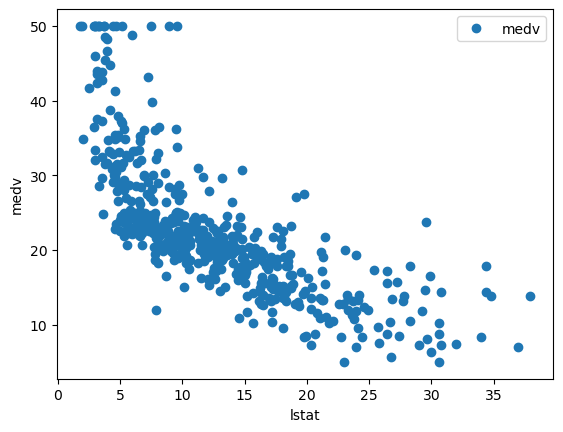

In [10]:
import matplotlib.pyplot as plt
data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

**Preparing data**

In [11]:
x=pd.DataFrame(data['lstat'])

In [12]:
x.head()

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [13]:
y=pd.DataFrame(data['medv'])

In [14]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [15]:
x.size , y.size

(506, 506)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [17]:
x.head()

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
print(regressor.intercept_)#value of the c

[34.33497839]


In [22]:
print(regressor.coef_)#value of the slope

[[-0.92441715]]


In [23]:
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred, columns=['Predicted'])

In [24]:
y_pred

,Predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
...,...
97,26.791734
98,30.507891
99,22.317555
100,19.830873


In [92]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [25]:
y_pred_tr=regressor.predict(x_train)
y_pred_tr=pd.DataFrame(y_pred_tr, columns=['Predicted'])

In [26]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train, y_pred_tr))
print('Mean Squared Error:',metrics.mean_squared_error(y_train, y_pred_tr))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_tr)))

Mean Absolute Error: 4.384375153324861
Mean Squared Error: 36.389745631141025
Root Mean Squared Error: 6.032391369195223


In [27]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.078127727696938
Mean Squared Error: 46.99482091954711
Root Mean Squared Error: 6.855276866731723


**Multiple linear regression**

In [28]:
import pandas as pd
import numpy as np
dataset=pd.read_csv('Boston1.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
x=pd.DataFrame(dataset.iloc[:,:-1])#independant variable
y=pd.DataFrame(dataset.iloc[:,-1])#dependant variable

In [30]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=5)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
v=pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w=pd.DataFrame(x.columns, columns=['Attribute'])

In [35]:
v

,Co-efficient
0,-0.130800
1,0.049403
2,0.001095
3,2.705366
4,-15.957050
5,3.413973
6,0.001119
7,-1.493081
8,0.364422
9,-0.013172


In [36]:
w

,Attribute
0,crim
1,zn
2,indus
3,chas
4,nox
5,rm
6,age
7,dis
8,rad
9,tax


In [37]:
coef_df=pd.concat([w,v],axis=1,join='inner')
coef_df

,Attribute,Co-efficient
0,crim,-0.130800
1,zn,0.049403
2,indus,0.001095
3,chas,2.705366
4,nox,-15.957050
5,rm,3.413973
6,age,0.001119
7,dis,-1.493081
8,rad,0.364422
9,tax,-0.013172


In [38]:
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826
...,...
97,21.912956
98,22.394774
99,13.193354
100,23.969911


In [39]:
y_test

,medv
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2
...,...
349,26.6
212,22.4
156,13.1
480,23.0


In [40]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2132704958423632
Mean Squared Error: 20.869292183770522
Root Mean Squared Error: 4.568292042303176
